<a href="https://colab.research.google.com/github/playbase/ETL_Hive_Assignments/blob/main/dl_with_regression_18_may_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
import pandas as pd

In [ ]:

from google.colab import files

uploaded = files.upload()

Saving training_set (1).csv to training_set (1).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['training_set (1).csv']))
df.T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1,...,9,5,5,7,10,8,2,5,4,6
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,...,2009,2009,2006,2006,2009,2007,2010,2010,2010,2008
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,New,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,...,Normal,Partial,Normal,Abnorml,Normal,Normal,Normal,Normal,Normal,Normal


In [ ]:
#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
N=df.isna().sum()
N

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

In [ ]:
#Pre-Processing via Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
cat=[]
con=[]

for i in x.columns:
    if x[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [ ]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scalar',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encode',OneHotEncoder())])

In [ ]:
pre=ColumnTransformer([('num_pipe',num_pipe,con),('cat_pipe',cat_pipe,cat)])

In [ ]:
pre

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'Bsm...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', ...])])

In [ ]:
x1=pd.DataFrame(pre.fit_transform(x).toarray(),columns=pre.get_feature_names_out())
x1

,num_pipe__Id,num_pipe__MSSubClass,num_pipe__LotFrontage,num_pipe__LotArea,num_pipe__OverallQual,num_pipe__OverallCond,num_pipe__YearBuilt,num_pipe__YearRemodAdd,num_pipe__MasVnrArea,num_pipe__BsmtFinSF1,...,cat_pipe__SaleType_ConLw,cat_pipe__SaleType_New,cat_pipe__SaleType_Oth,cat_pipe__SaleType_WD,cat_pipe__SaleCondition_Abnorml,cat_pipe__SaleCondition_AdjLand,cat_pipe__SaleCondition_Alloca,cat_pipe__SaleCondition_Family,cat_pipe__SaleCondition_Normal,cat_pipe__SaleCondition_Partial
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1.723747,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1.726120,0.309859,-0.175462,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1.728492,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x1.shape

(1460, 288)

In [ ]:
#Split The Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=21)

In [ ]:
#Model Creation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
nn=Sequential()

In [ ]:
#Create the architecture
#input layer
nn.add(Dense(300,input_dim=x_train.shape[1],activation='relu'))

#hidden layer
nn.add(Dense(500,activation='relu'))
nn.add(Dense(500,activation='relu'))
nn.add(Dense(500,activation='relu'))
#nn.add(Dense(500,activation='relu'))

#output layer , linear since using regression
nn.add(Dense(1,activation='linear'))

In [ ]:
nn.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [ ]:
hist=nn.fit(x_train,y_train,validation_split=0.1,epochs=30)

Epoch 1/30
33/33 [==============================] - 8s 79ms/step - loss: 8916872192.0000 - mae: 70900.2266 - val_loss: 405383424.0000 - val_mae: 13825.5918
Epoch 2/30
33/33 [==============================] - 1s 45ms/step - loss: 285647136.0000 - mae: 12722.7178 - val_loss: 513118368.0000 - val_mae: 16737.5430
Epoch 3/30
33/33 [==============================] - 1s 46ms/step - loss: 56170200.0000 - mae: 5508.8730 - val_loss: 358595712.0000 - val_mae: 13288.4766
Epoch 4/30
33/33 [==============================] - 1s 45ms/step - loss: 23403180.0000 - mae: 3656.4543 - val_loss: 335377792.0000 - val_mae: 12841.8623
Epoch 5/30
33/33 [==============================] - 2s 46ms/step - loss: 16850428.0000 - mae: 3045.9382 - val_loss: 335158400.0000 - val_mae: 12911.0332
Epoch 6/30
33/33 [==============================] - 2s 46ms/step - loss: 12679844.0000 - mae: 2706.9292 - val_loss: 344820640.0000 - val_mae: 13006.0234
Epoch 7/30
33/33 [==============================] - 1s 45ms/step - loss: 1207

In [ ]:
# Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
#Train Data Evaluation
y_pred_train=nn.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
mae=mean_absolute_error(y_train,y_pred_train)
r=r2_score(y_train,y_pred_train)
rmse=mse**0.5

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2:',r)

37/37 [==============================] - 1s 10ms/step
MSE: 48037007.36328543
RMSE: 6930.873492084921
MAE: 4009.058247605415
R2: 0.9922382314672659


In [ ]:
#Test Data Evaluation
y_pred_test=nn.predict(x_test)

mse1=mean_squared_error(y_pred_test,y_test)
rmse1=mse1**0.5
mae1=mean_absolute_error(y_pred_test,y_test)
r1=r2_score(y_pred_test,y_test)

print('MSE:',mse1)
print('RMSE:',rmse1)
print('MAE:',mae1)
print('R2 Score:',r1)

10/10 [==============================] - 0s 10ms/step
MSE: 1251119585.8119864
RMSE: 35371.168849954425
MAE: 17763.636156892124
R2 Score: 0.8095976147295246


In [ ]:
import matplotlib.pyplot as plt

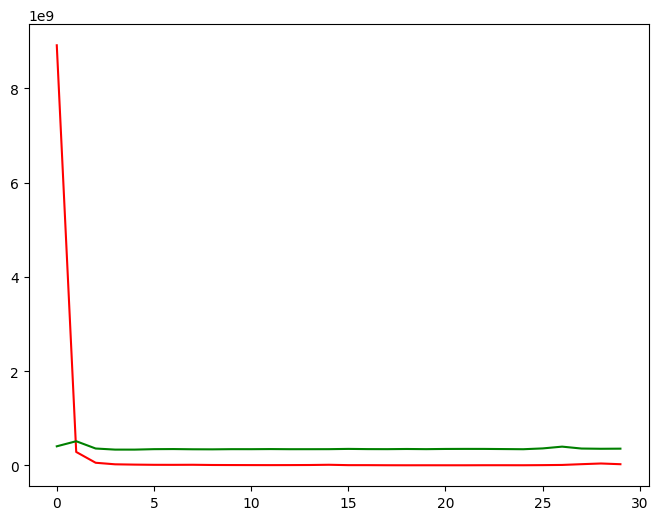

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.plot(hist.history['loss'],c='red')
plt.plot(hist.history['val_loss'],c='green')